In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix

## 1. Loading the Dataset

In [227]:
df = pd.read_csv('Final_Subscription_Service_Churn_Dataset.csv')
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,...,25,Comedy,3.489465,7,Female,15,No,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,...,21,Comedy,2.251860,3,Male,8,No,NaN,RIH7RFEZCS,0
2,6,NaN,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,...,29,Fantasy,NaN,4,Male,14,No,Yes,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,...,45,Drama,1.275004,3,Male,12,No,NaN,Z4GZJIB90P,0
4,27,NaN,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,...,44,Comedy,3.236230,4,Female,18,No,NaN,B3BDJTW0L9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,83,5.157131,428.041874,Basic,NaN,No,Movies,No,Mobile,2.520628,...,40,Action,2.200066,9,Male,21,Yes,NaN,AV3ZDGUB4C,0
959,67,13.149346,881.006183,Basic,NaN,Yes,TV Shows,No,Computer,3.737329,...,40,NaN,NaN,1,Male,22,No,NaN,15GWB8NVG5,0
960,119,8.575780,1020.517781,Basic,Bank transfer,Yes,TV Shows,Yes,TV,5.691826,...,5,Fantasy,3.330466,2,Male,23,No,NaN,6VUYH24HVW,0
961,57,15.908851,NaN,Basic,NaN,Yes,Movies,No,Mobile,30.267865,...,40,Sci-Fi,NaN,0,Male,14,No,NaN,X1OE7MMFDL,0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            759 non-null    float64
 2   TotalCharges              777 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                702 non-null    float64
 14  SupportTic

In [229]:
df.isna().sum()

AccountAge                    0
MonthlyCharges              204
TotalCharges                186
SubscriptionType             50
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered             76
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                  261
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
SubtitlesEnabled            800
CustomerID                    0
Churn                         0
dtype: int64

## 2. Handling Missing Values

### I. Dropping the column

#### A. Subtitles

In [230]:
df['SubtitlesEnabled'].isna().sum()         

800

In [231]:
df = df.drop(['SubtitlesEnabled'], axis = 1)

### II. Handling Categorical NaNs

#### A. Gender

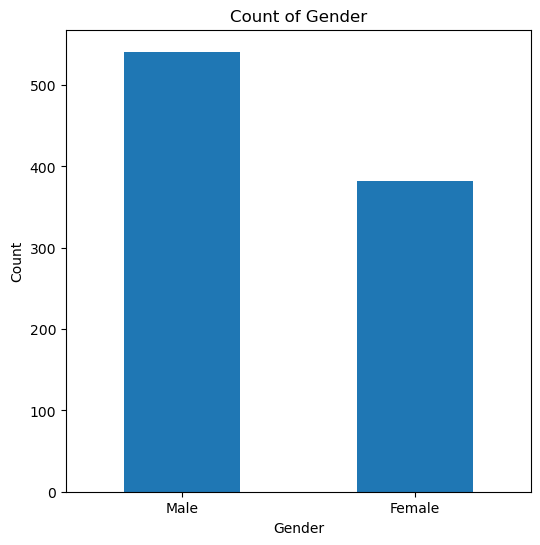

In [232]:
# Count the occurrences of each category in Gender
gender_counts = df['Gender'].value_counts(dropna=True)

# Create a bar plot
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='bar')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [233]:
# Fill NaN values in Gender with the mode
mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)

/tmp/ipykernel_6280/1868148450.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_gender, inplace=True)


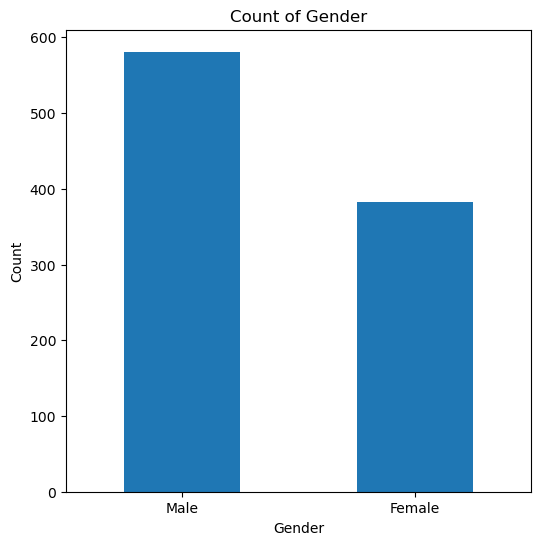

In [234]:
# Count the occurrences of each category in Gender
gender_counts = df['Gender'].value_counts(dropna=True)

# Create a bar plot
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='bar')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### B. SubscriptionType

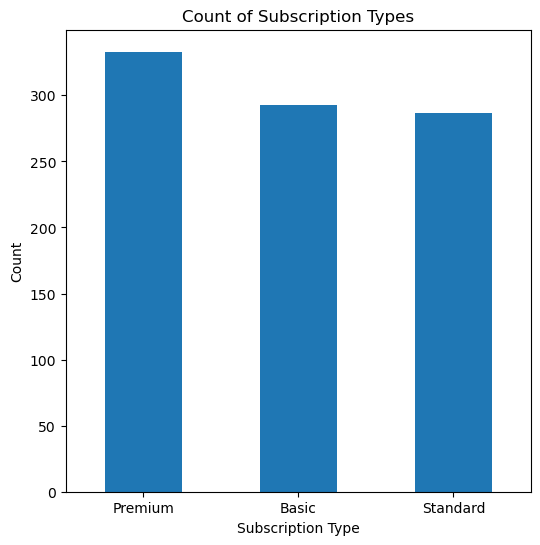

In [235]:
# Count the occurrences of each category in SubscriptionType
subscription_type_counts = df['SubscriptionType'].value_counts(dropna=True)

# Create a bar plot
plt.figure(figsize=(6, 6))
subscription_type_counts.plot(kind='bar')
plt.title('Count of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [236]:
# Fill NaN values in SubscriptionType with the mode
mode_subscription_type = df['SubscriptionType'].mode()[0]
df['SubscriptionType'].fillna(mode_subscription_type, inplace=True)

/tmp/ipykernel_6280/2357815791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SubscriptionType'].fillna(mode_subscription_type, inplace=True)


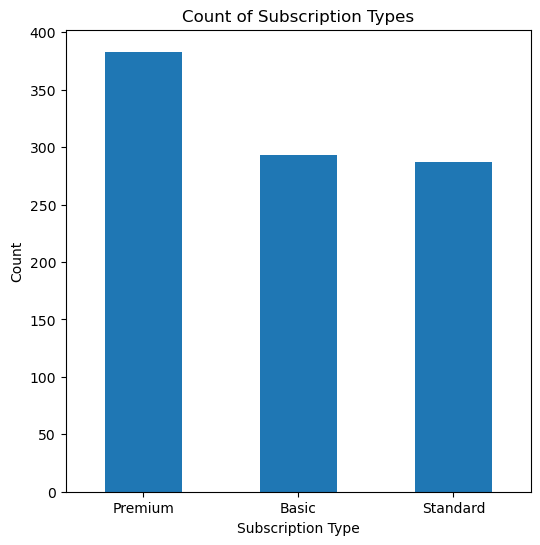

In [237]:
# Count the occurrences of each category in SubscriptionType
subscription_type_counts = df['SubscriptionType'].value_counts(dropna=True)

# Create a bar plot
plt.figure(figsize=(6, 6))
subscription_type_counts.plot(kind='bar')
plt.title('Count of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### C. PaymentMethod

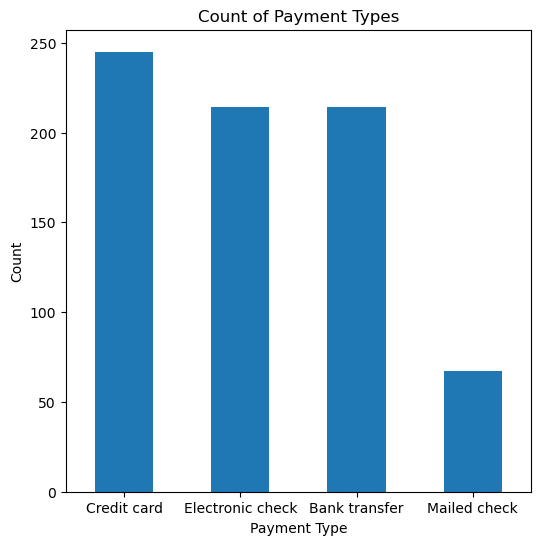

In [238]:
# Count the occurrences of each category in PaymentMethod
payment_type_counts = df['PaymentMethod'].value_counts(dropna=True)

# Create a bar plot
plt.figure(figsize=(6, 6))
payment_type_counts.plot(kind='bar')
plt.title('Count of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [239]:
# Fill NaN values in PaymentMethod with the mode
mode_PaymentMethod= df['PaymentMethod'].mode()[0]
df['PaymentMethod'].fillna(mode_PaymentMethod, inplace=True)

/tmp/ipykernel_6280/3734803752.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PaymentMethod'].fillna(mode_PaymentMethod, inplace=True)


#### D. DeviceRegistered

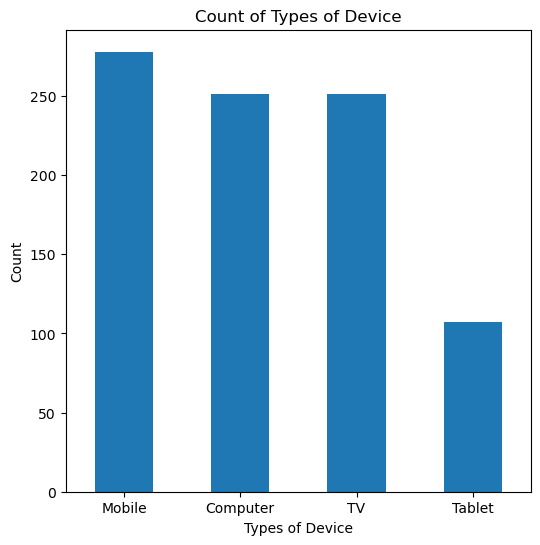

In [240]:
# Count the occurrences of each category in DeviceRegistered
device_type_counts = df['DeviceRegistered'].value_counts(dropna=True)

# Create a bar plot
plt.figure(figsize=(6, 6))
device_type_counts.plot(kind='bar')
plt.title('Count of Types of Device')
plt.xlabel('Types of Device')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [241]:
# Fill NaN values in DeviceRegistered with the mode
mode_DeviceRegistered = df['DeviceRegistered'].mode()[0]
df['DeviceRegistered'].fillna(mode_DeviceRegistered, inplace=True)

/tmp/ipykernel_6280/2437658424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DeviceRegistered'].fillna(mode_DeviceRegistered, inplace=True)


#### E. GenrePreference

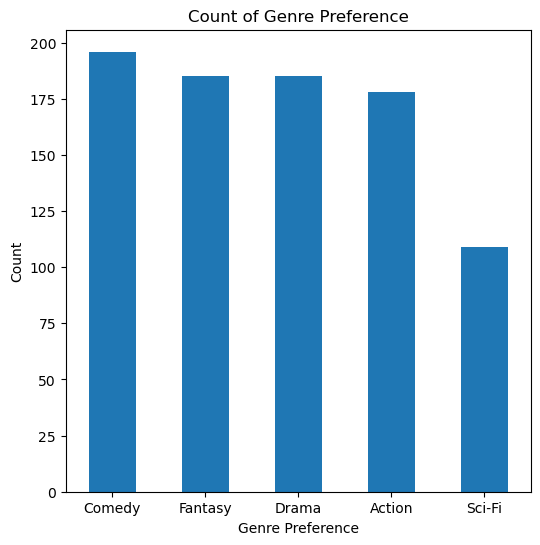

In [242]:
# Count the occurrences of each category in GenrePreference
Genre_type_counts = df['GenrePreference'].value_counts(dropna=True)

# Create a bar plot
plt.figure(figsize=(6, 6))
Genre_type_counts.plot(kind='bar')
plt.title('Count of Genre Preference')
plt.xlabel('Genre Preference')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [243]:
# Fill NaN values in GenrePreference with the mode
mode_GenrePreference = df['GenrePreference'].mode()[0]
df['GenrePreference'].fillna(mode_GenrePreference, inplace=True)

/tmp/ipykernel_6280/1133149585.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GenrePreference'].fillna(mode_GenrePreference, inplace=True)


### III. Handling Continous NaNs

#### A. Monthly Charges

In [244]:
pd.DataFrame(df['MonthlyCharges'].describe())

,MonthlyCharges
count,759.000000
mean,12.328262
std,4.260861
min,5.062339
25%,8.816669
50%,12.169888
75%,15.937606
max,19.932542


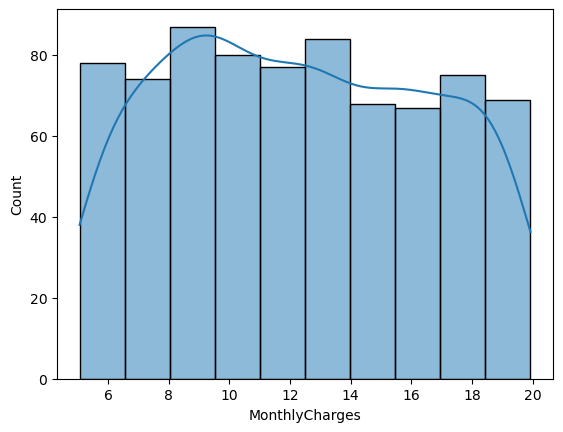

In [245]:
sns.histplot(df, x='MonthlyCharges', bins =10, kde = True);

In [246]:
# Fill NaN values in MonthlyCharges with the mean
df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)

/tmp/ipykernel_6280/908841864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace=True)


#### B. Total Charges                

In [247]:
pd.DataFrame(df['TotalCharges'].describe())

,TotalCharges
count,777.000000
mean,714.052121
std,511.071322
min,11.582882
25%,318.425396
50%,614.196606
75%,1021.436452
max,2261.019201


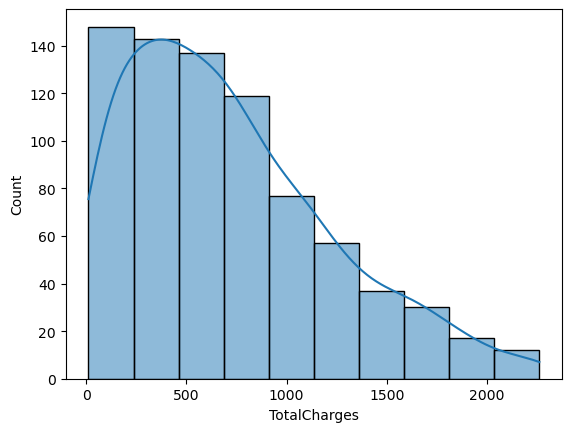

In [248]:
sns.histplot(df, x='TotalCharges', bins =10, kde = True);

In [249]:
# Fill NaN values in TotalCharges with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipykernel_6280/2204977603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


#### C. UserRating

In [250]:
pd.DataFrame(df['UserRating'].describe())

,UserRating
count,702.000000
mean,2.923945
std,1.165992
min,1.000181
25%,1.922235
50%,2.898328
75%,3.953953
max,4.997348


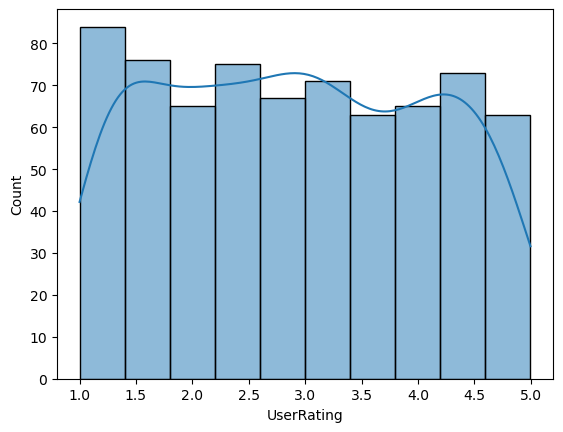

In [251]:
sns.histplot(df, x='UserRating', bins =10, kde = True);

In [252]:
# Fill NaN values in UserRating with the mean
df['UserRating'].fillna(df['UserRating'].mean(), inplace=True)

/tmp/ipykernel_6280/1014571068.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UserRating'].fillna(df['UserRating'].mean(), inplace=True)


In [253]:
df.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
CustomerID                  0
Churn                       0
dtype: int64

## 3. Exploratory Analysis (Visualization)

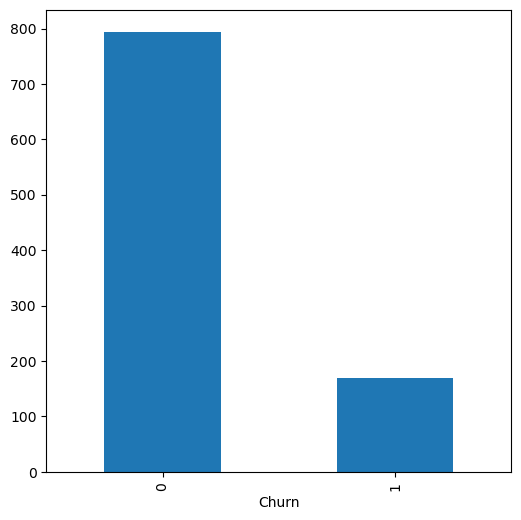

In [254]:
df.groupby('Churn').size().plot(kind='bar', figsize=(6,6));

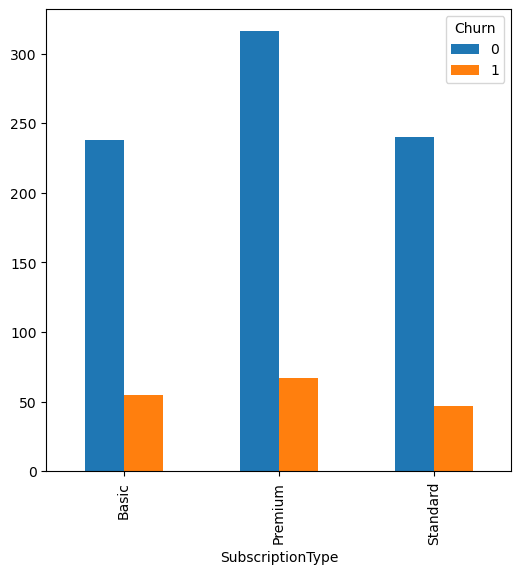

In [255]:
df.groupby(["SubscriptionType", "Churn"]).size().unstack().plot(kind='bar', figsize=(6,6));

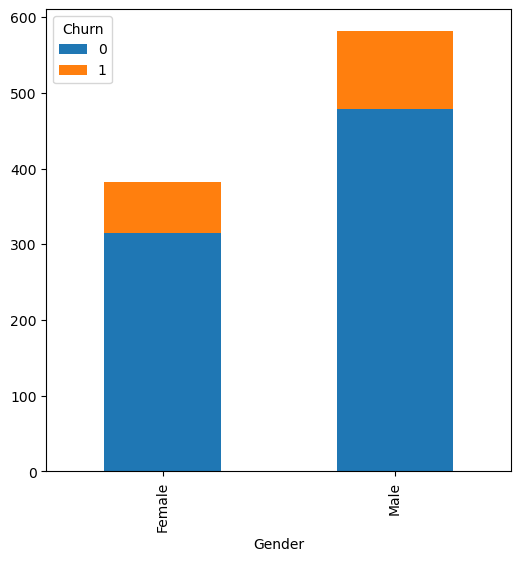

In [256]:
df.groupby(['Gender', 'Churn']).size().unstack().plot(kind='bar', stacked = True, figsize=(6,6));

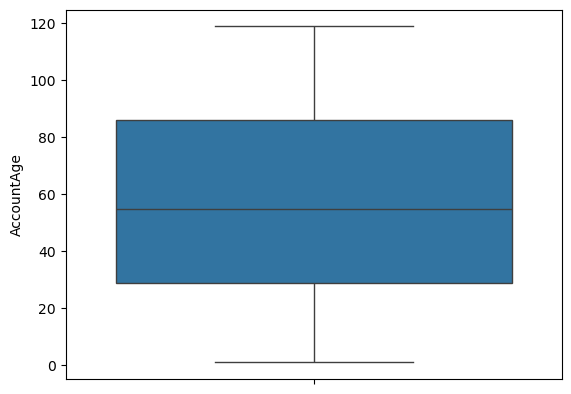

In [257]:
sns.boxplot(df, y= 'AccountAge');

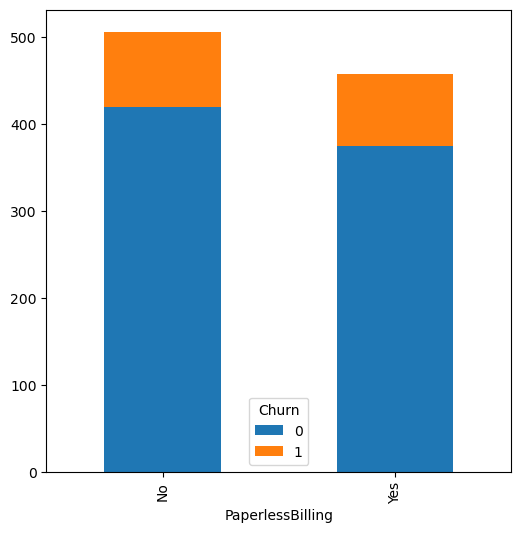

In [258]:
df.groupby(['PaperlessBilling', 'Churn']).size().unstack().plot(kind='bar', stacked = True, figsize=(6,6));

In [259]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,CustomerID,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,24.593361,25,Comedy,3.489465,7,Female,15,No,LOHRYYC9E8,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,102.860795,21,Comedy,2.251860,3,Male,8,No,RIH7RFEZCS,0
2,6,12.328262,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,10.512415,29,Fantasy,2.923945,4,Male,14,No,JB5J8X2UY1,1
3,54,17.917819,967.562224,Basic,Credit card,Yes,Movies,No,Mobile,2.495373,45.246834,45,Drama,1.275004,3,Male,12,No,Z4GZJIB90P,0
4,27,12.328262,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,94.310954,44,Comedy,3.236230,4,Female,18,No,B3BDJTW0L9,0


In [260]:
df_numeric = df.select_dtypes(include=['int64', 'float64', 'uint8'])

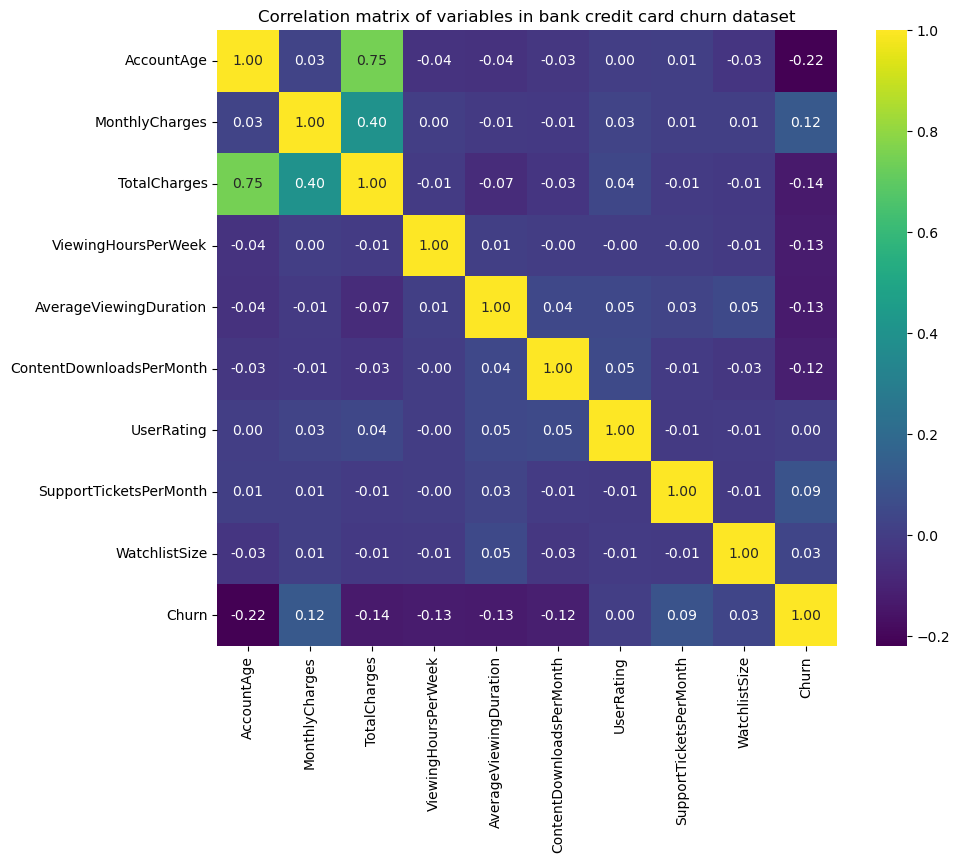

In [261]:
corr_matrix = df_numeric.corr()

# Plotting the correlation using Seaborn's heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt='.2f')
plt.title("Correlation matrix of variables in bank credit card churn dataset")
plt.savefig('./corr.png', bbox_inches="tight")
plt.show()

## 4. Prepratation of the Dataset

### I. One Hot Encoding

In [262]:
df = pd.get_dummies(df, columns=['SubscriptionType',
                                 'PaymentMethod',
                                 'ContentType',
                                 'DeviceRegistered',
                                 'GenrePreference',
                                 'Gender'])

In [263]:
df = df.replace({True: 1, False: 0})

/tmp/ipykernel_6280/3074727906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


### II. Ordinal Encoding

In [264]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['MultiDeviceAccess'] = df['MultiDeviceAccess'].replace({'Yes': 1, 'No': 0})
df['ParentalControl'] = df['ParentalControl'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_6280/2239703673.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
/tmp/ipykernel_6280/2239703673.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MultiDeviceAccess'] = df['MultiDeviceAccess'].replace({'Yes': 1, 'No': 0})
/tmp/ipykernel_6280/2239703673.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AccountAge                      963 non-null    int64  
 1   MonthlyCharges                  963 non-null    float64
 2   TotalCharges                    963 non-null    float64
 3   PaperlessBilling                963 non-null    int64  
 4   MultiDeviceAccess               963 non-null    int64  
 5   ViewingHoursPerWeek             963 non-null    float64
 6   AverageViewingDuration          963 non-null    float64
 7   ContentDownloadsPerMonth        963 non-null    int64  
 8   UserRating                      963 non-null    float64
 9   SupportTicketsPerMonth          963 non-null    int64  
 10  WatchlistSize                   963 non-null    int64  
 11  ParentalControl                 963 non-null    int64  
 12  CustomerID                      963 

### III. Splitting the Dataset

In [266]:
X = df.drop(['CustomerID', 'Churn'], axis = 1)
y = df['Churn']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [268]:
y_train.size, y_test.size

(674, 289)

## 5. Inferential Analysis

#### A. Descriptive Statistics for Churn (Target Variable)

In [269]:
print("y_train Descriptive Statistics:\n", y_train.describe())
print("\ny_test Descriptive Statistics:\n", y_test.describe())

y_train Descriptive Statistics:
 count    674.000000
mean       0.164688
std        0.371175
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Churn, dtype: float64

y_test Descriptive Statistics:
 count    289.000000
mean       0.200692
std        0.401213
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Churn, dtype: float64


In [270]:
#Making Assumption for distribution for train and test usig Z test for CI 95%

pop_mean = 0.164688
sample_mean = 0.200692
pop_std = 0.371175
n_samples = 674
alpha = 0.05
z_score = -(sample_mean-pop_mean)/(pop_std/np.sqrt(n_samples))
print("Calculated Z value is:", z_score)

if z_score < 1.96:
    print("The distribution of churn for Test and Train split is same, which is we accept the null hypothesis")
else:
    print("The distribution of churn for Test and Train split is not same, which is we reject the null hypothesis")

Calculated Z value is: -2.5182682158380345
The distribution of churn for Test and Train split is same, which is we accept the null hypothesis


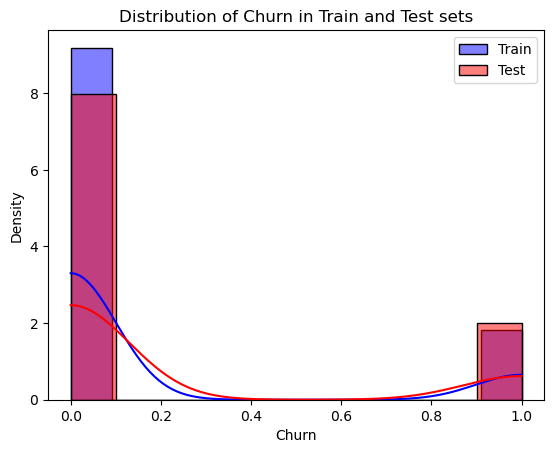

In [271]:
sns.histplot(y_train, color='blue', label='Train', kde=True, stat='density')
sns.histplot(y_test, color='red', label='Test', kde=True, stat='density')
plt.legend()
plt.title(f'Distribution of Churn in Train and Test sets')
plt.show()

#### B. Descriptive Statistics for Predictors

In [272]:
print("X_train Descriptive Statistics:\n", X_train.describe())
print("\nX_test Descriptive Statistics:\n", X_test.describe())

X_train Descriptive Statistics:
        AccountAge  MonthlyCharges  TotalCharges  PaperlessBilling  \
count  674.000000      674.000000    674.000000        674.000000   
mean    57.875371       12.287335    700.375784          0.480712   
std     33.066944        3.787800    456.936230          0.499999   
min      1.000000        5.064326     11.582882          0.000000   
25%     29.250000        9.516069    380.809194          0.000000   
50%     56.500000       12.328262    614.196606          0.000000   
75%     85.000000       14.892316    903.100455          1.000000   
max    119.000000       19.858932   2261.019201          1.000000   

       MultiDeviceAccess  ViewingHoursPerWeek  AverageViewingDuration  \
count         674.000000           674.000000              674.000000   
mean            0.470326            21.151752               90.105208   
std             0.499489            11.471837               50.211522   
min             0.000000             0.315317        

In [273]:
continuous_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration',
                        'UserRating', 'SupportTicketsPerMonth']
# For numpy 2.* np.bool_ instead of np.bool
for feature in continuous_features:
    if X_train[feature].dtype == 'bool' or X_train[feature].dtype == np.bool_:
        X_train[feature] = X_train[feature].astype(np.int64)
    if X_test[feature].dtype == 'bool' or X_test[feature].dtype == np.bool_:
        X_test[feature] = X_test[feature].astype(np.int64)

# T-Test for continuous features
for feature in continuous_features:
    t_stat, p_value = stats.ttest_ind(X_train[feature], X_test[feature])
    print(f"{feature} - T-statistic: {t_stat}, P-value: {p_value}")
    # Decision based on 95% CI
    if p_value < 0.01:
        print(f"Reject the null hypothesis for {feature}: There is a significant difference.\n")
    else:
        print(f"Fail to reject the null hypothesis for {feature}: No significant difference.\n")

AccountAge - T-statistic: 0.5070607422086648, P-value: 0.6122285284907529
Fail to reject the null hypothesis for AccountAge: No significant difference.

MonthlyCharges - T-statistic: -0.5126194301348834, P-value: 0.6083353592614704
Fail to reject the null hypothesis for MonthlyCharges: No significant difference.

TotalCharges - T-statistic: 0.5769193064185365, P-value: 0.5641290813105202
Fail to reject the null hypothesis for TotalCharges: No significant difference.

ViewingHoursPerWeek - T-statistic: 0.5127758179459186, P-value: 0.6082259889812389
Fail to reject the null hypothesis for ViewingHoursPerWeek: No significant difference.

AverageViewingDuration - T-statistic: -0.6041677891113916, P-value: 0.5458746915681386
Fail to reject the null hypothesis for AverageViewingDuration: No significant difference.

UserRating - T-statistic: -0.5949927900884144, P-value: 0.5519883593641388
Fail to reject the null hypothesis for UserRating: No significant difference.

SupportTicketsPerMonth - 

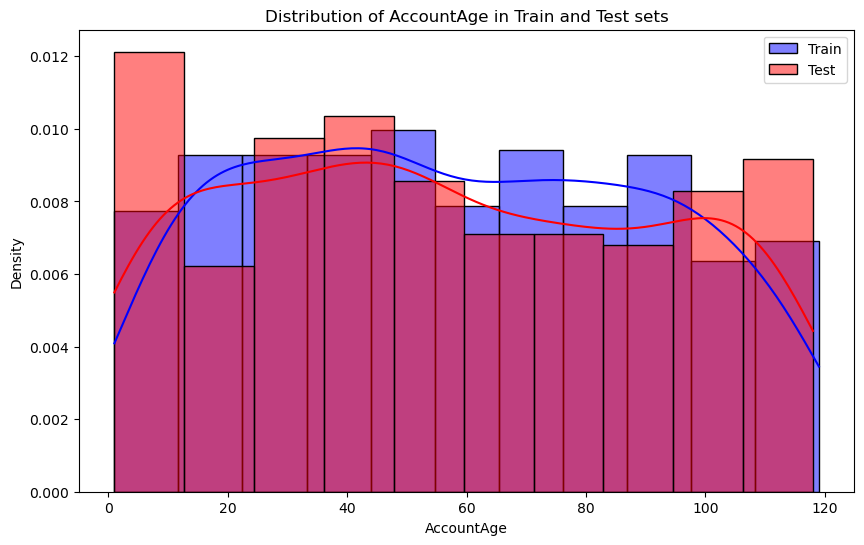

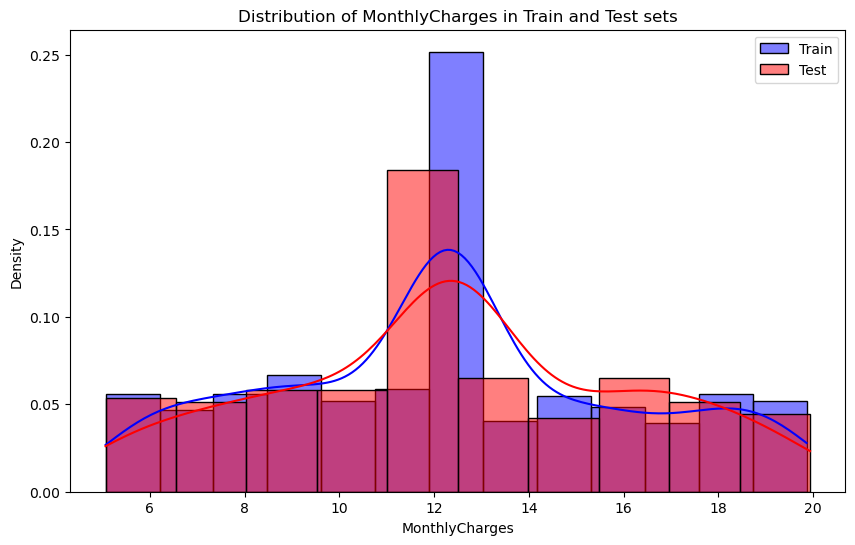

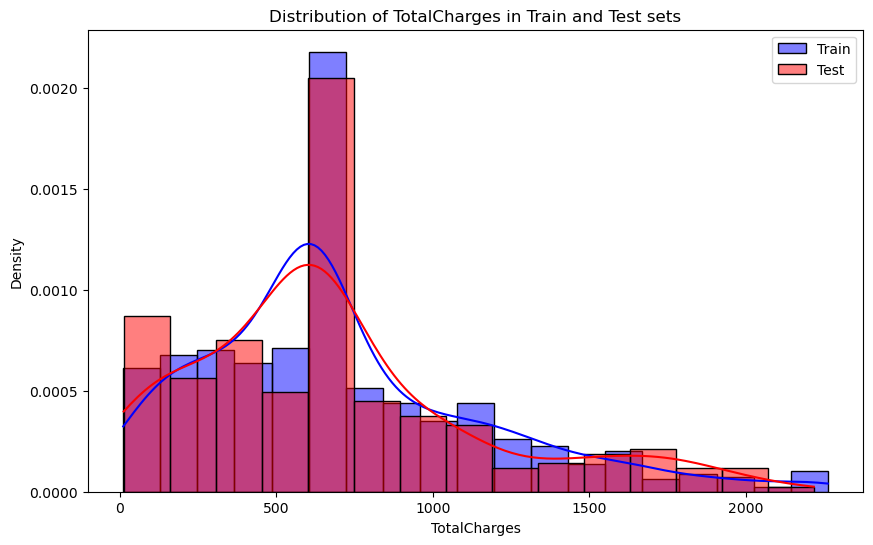

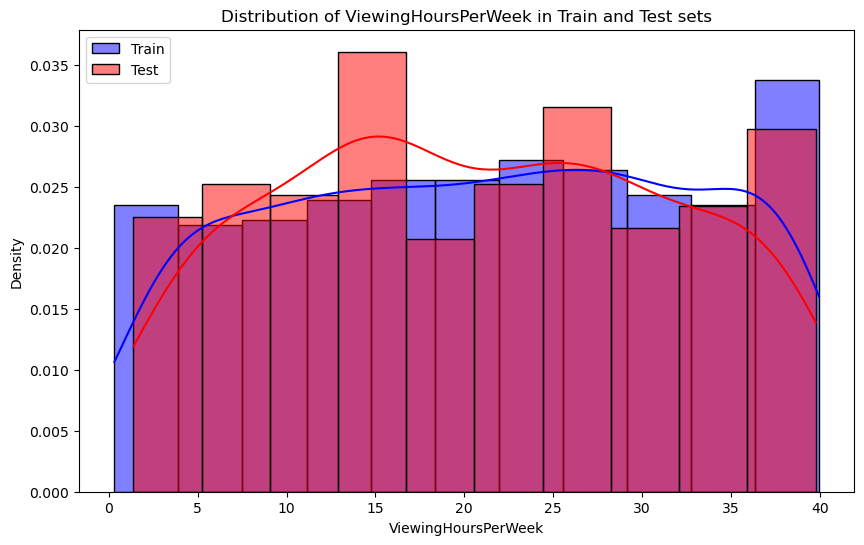

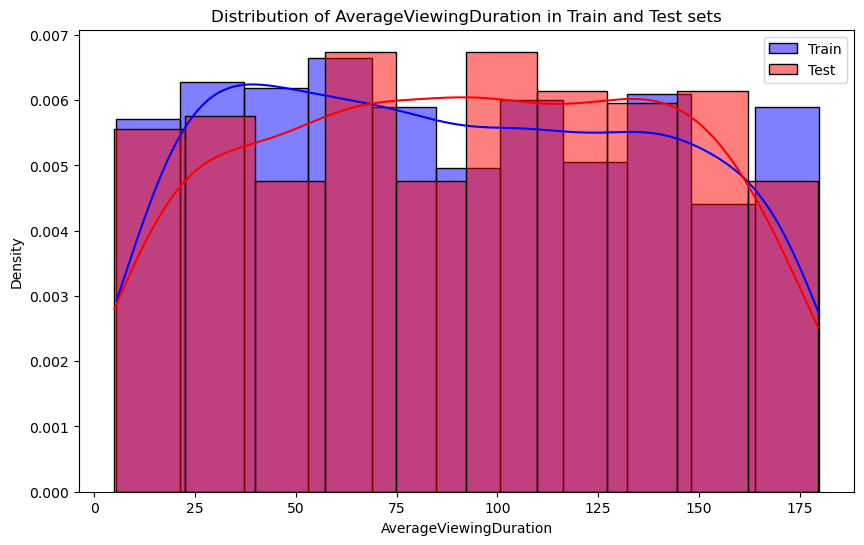

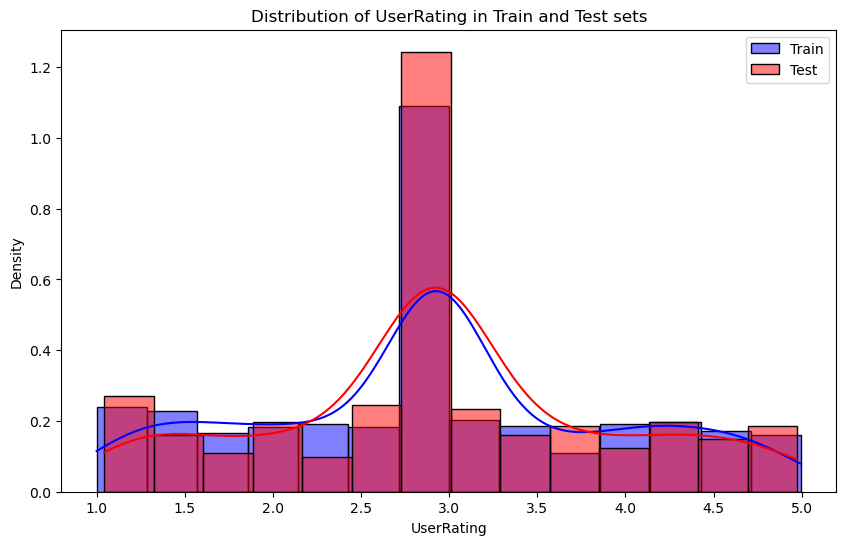

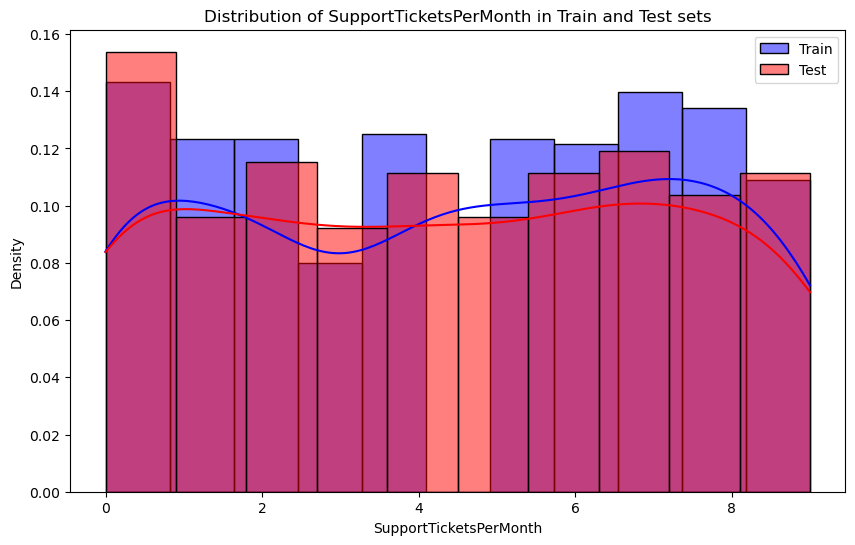

In [274]:
# Distribution Plots
def plot_distributions(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[feature], color='blue', label='Train', kde=True, stat='density')
    sns.histplot(X_test[feature], color='red', label='Test', kde=True, stat='density')
    plt.legend()
    plt.title(f'Distribution of {feature} in Train and Test sets')
    plt.show()

for feature in continuous_features:
    plot_distributions(feature)


### C. Conclusion


#### We found out that there is no significant difference between the split for training and testing for both target and other variables. This means we can continue using our ML algorithm

## 6. Applying ML Algorithm

### I. KNN

In [275]:
#pip install scikit-learn imbalanced-learn

In [276]:
#import imblearn

In [277]:
# from imblearn.combine import SMOTEENN

# smote_enn = SMOTEENN(random_state=42)
# X_res, y_res = smote_enn.fit_resample(X_train, y_train)

In [278]:
# Scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [279]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [280]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [281]:
result= knn.predict(X_test)
print(result)

[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [282]:
# Confusion Matrix
print (pd.crosstab(y_test,result, rownames=['Real'], colnames=['Predict'], margins=True))

Predict    0   1  All
Real                 
0        219  12  231
1         46  12   58
All      265  24  289


Note
1. True Positives (TP): 12 (Predicted churn correctly)
2. True Negatives (TN): 219 (Predicted non-churn correctly)
3. False Positives (FP): 12 (Predicted churn incorrectly)
4. False Negatives (FN): 46 (Predicted non-churn incorrectly)

In [283]:
from sklearn import metrics
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       231
           1       0.50      0.21      0.29        58

    accuracy                           0.80       289
   macro avg       0.66      0.58      0.59       289
weighted avg       0.76      0.80      0.76       289



### II. CART Model

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)
cart_predictions = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, cart_predictions)
print("CART Model Accuracy:", cart_accuracy)
print(classification_report(y_test, cart_predictions))


CART Model Accuracy: 0.71280276816609
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       231
           1       0.29      0.29      0.29        58

    accuracy                           0.71       289
   macro avg       0.55      0.56      0.56       289
weighted avg       0.71      0.71      0.71       289



## Performing hyperparameter tuning

In [285]:
cart_model = DecisionTreeClassifier(max_depth=3, random_state=42)
cart_model.fit(X_train, y_train)
cart_predictions = cart_model.predict(X_test)
cart_accuracy = accuracy_score(y_test, cart_predictions)
print("CART Model Accuracy:", cart_accuracy)
print(classification_report(y_test, cart_predictions))


CART Model Accuracy: 0.8062283737024222
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       231
           1       0.67      0.07      0.12        58

    accuracy                           0.81       289
   macro avg       0.74      0.53      0.51       289
weighted avg       0.78      0.81      0.74       289



### III. C4.5 Model

In [286]:
c45_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
c45_model.fit(X_train, y_train)
c45_predictions = c45_model.predict(X_test)
c45_accuracy = accuracy_score(y_test, c45_predictions)
print("C4.5 Model Accuracy:", c45_accuracy)
print(classification_report(y_test, c45_predictions))

C4.5 Model Accuracy: 0.71280276816609
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       231
           1       0.28      0.28      0.28        58

    accuracy                           0.71       289
   macro avg       0.55      0.55      0.55       289
weighted avg       0.71      0.71      0.71       289



## Performing hyperparameter tuning 

In [287]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy']  # Because we are using C4.5
}

grid_search = GridSearchCV(estimator=c45_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Getting the best parameter, and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

best_c45_model = grid_search.best_estimator_
best_c45_model.fit(X_train, y_train)

c45_predictions = best_c45_model.predict(X_test)
c45_accuracy = accuracy_score(y_test, c45_predictions)
print("C4.5 Model Accuracy after Tuning:", c45_accuracy)
print(classification_report(y_test, c45_predictions))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8130458817025982
C4.5 Model Accuracy after Tuning: 0.7993079584775087
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       231
           1       0.50      0.24      0.33        58

    accuracy                           0.80       289
   macro avg       0.67      0.59      0.60       289
weighted avg       0.76      0.80      0.77       289



In [288]:
c45_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
c45_model.fit(X_train, y_train)
c45_predictions = c45_model.predict(X_test)
c45_accuracy = accuracy_score(y_test, c45_predictions)
print("C4.5 Model Accuracy:", c45_accuracy)
print(classification_report(y_test, c45_predictions))

C4.5 Model Accuracy: 0.8027681660899654
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       231
           1       0.52      0.26      0.34        58

    accuracy                           0.80       289
   macro avg       0.68      0.60      0.61       289
weighted avg       0.77      0.80      0.78       289



### IV. K Means Clustering

In [289]:
from sklearn.cluster import KMeans

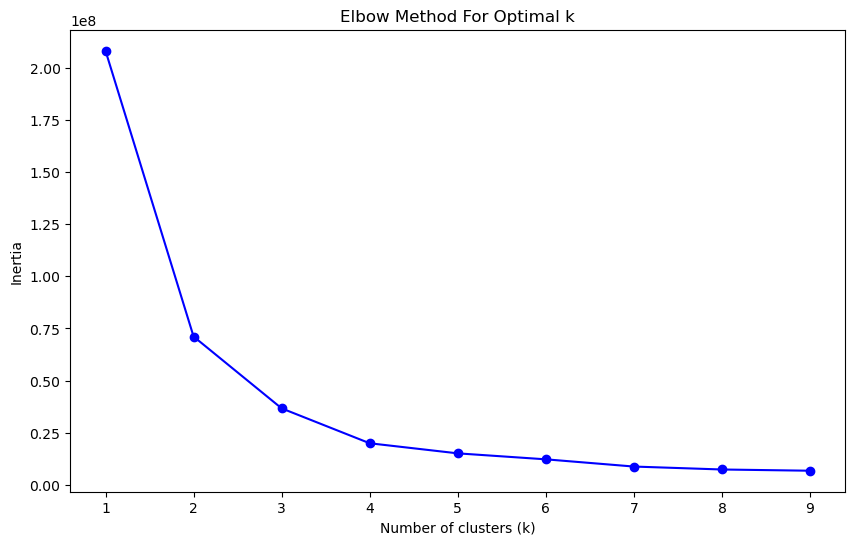

In [290]:
# Elbow method to determine the optimal number of clusters
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [291]:
#k-means clustering with k = 5
kmeans_5 = KMeans(n_clusters = 5, random_state = 42)
cluster_5 = kmeans_5.fit_predict(X)
X['Cluster_5'] = cluster_5

In [292]:
X['Cluster_5'].value_counts()

Cluster_5
1    402
2    259
4    147
0     90
3     65
Name: count, dtype: int64

In [293]:
from sklearn.decomposition import PCA

In [294]:
# Using PCA
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X)
X_train_reduced_df = pd.DataFrame(X_train_reduced, columns=['PC1', 'PC2'])
X_train_reduced_df['Cluster_5'] = cluster_5

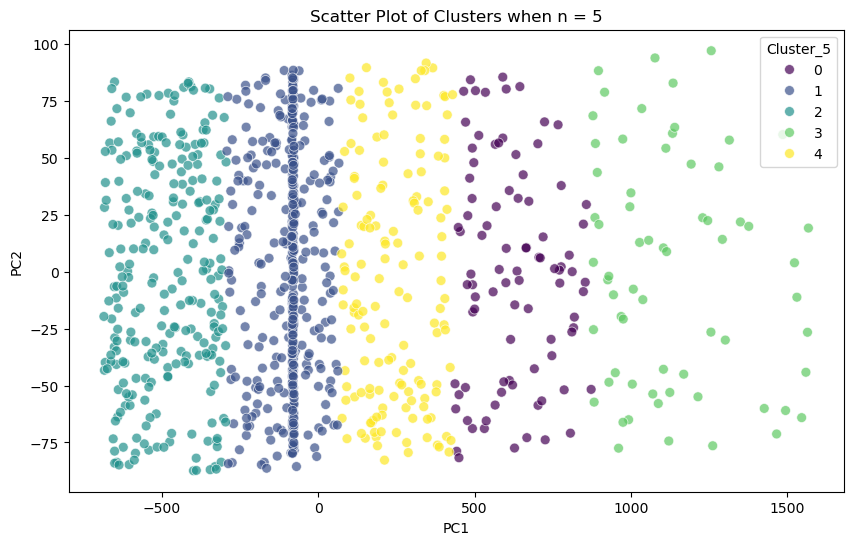

In [295]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train_reduced_df, x='PC1', y='PC2', hue='Cluster_5', palette='viridis', s=50, alpha=0.7)
plt.title('Scatter Plot of Clusters when n = 5')
plt.savefig('./img1.png', bbox_inches='tight')
plt.show()

### V. Neural Network

In [296]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [297]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/tckleme/miniconda3/envs/python_3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [298]:
# Compile the model
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [299]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.5536 - val_accuracy: 0.7993 - val_loss: 0.4891
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8438 - loss: 0.4104 - val_accuracy: 0.7993 - val_loss: 0.4669
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8111 - loss: 0.4176 - val_accuracy: 0.7993 - val_loss: 0.4601
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8164 - loss: 0.4019 - val_accuracy: 0.7993 - val_loss: 0.4553
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8308 - loss: 0.3565 - val_accuracy: 0.7993 - val_loss: 0.4464
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8199 - loss: 0.3409 - val_accuracy: 0.7993 - val_loss: 0.4545
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8559 - loss: 0.2778 - val_accuracy: 0.7993 - val_loss: 0.4351
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8537 - loss: 0.2802 - val_accuracy: 0.80

In [300]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8096 - loss: 1.3955
Loss: 1.552771806716919, Accuracy: 0.8166090250015259


In [301]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

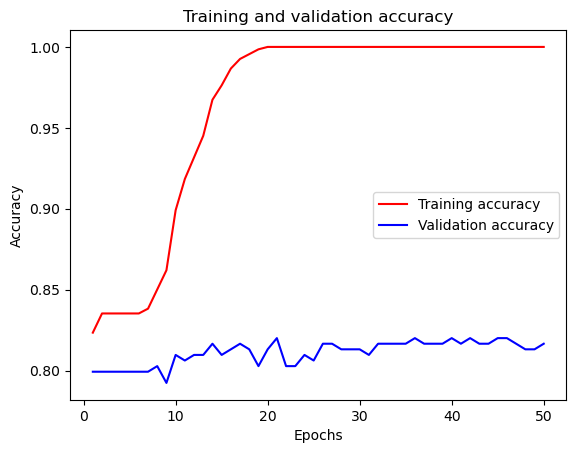

In [302]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

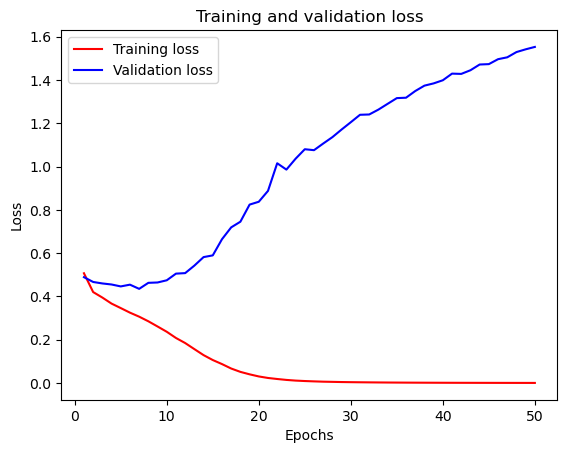

In [303]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Applying L2 Regularization

In [304]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.03)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=((X_test, y_test)), epochs=100, batch_size=32)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4735 - loss: 2.4178 - val_accuracy: 0.7924 - val_loss: 2.0215
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8224 - loss: 1.9275 - val_accuracy: 0.7993 - val_loss: 1.7676
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8292 - loss: 1.6555 - val_accuracy: 0.7993 - val_loss: 1.5539
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8210 - loss: 1.4710 - val_accuracy: 0.7993 - val_loss: 1.3761
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8290 - loss: 1.2870 - val_accuracy: 0.7993 - val_loss: 1.2316
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8482 - loss: 1.1228 - val_accuracy: 0.7993 - val_loss: 1.1100
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8331 - loss: 1.0191 - val_accuracy: 0.7993 - val_loss: 1.0064
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8518 - loss: 0.8939 - val_accuracy: 0.7993 - v

In [305]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.8108 - loss: 0.6107
Loss: 0.6342315673828125, Accuracy: 0.8096885681152344


In [306]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

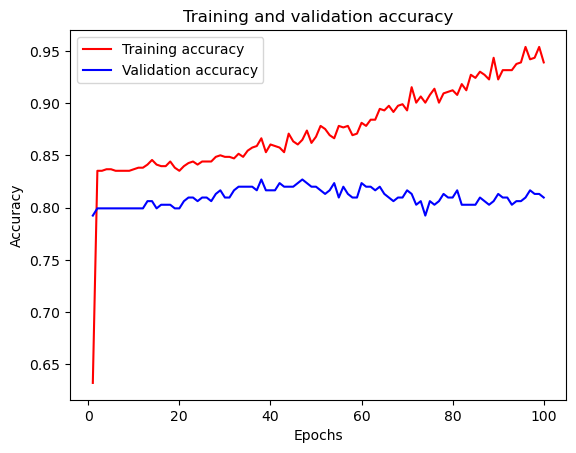

In [307]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

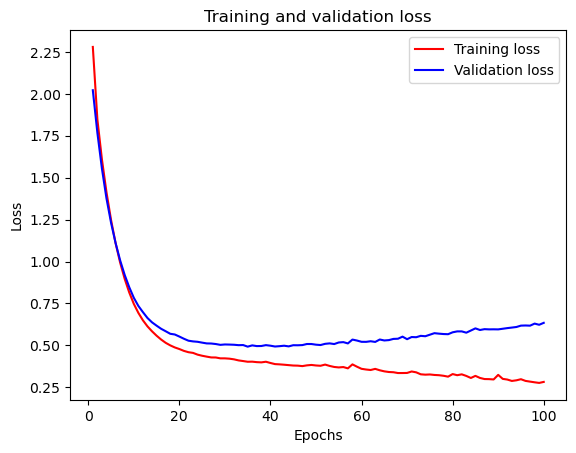

In [308]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()